In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time
import requests
import datetime as dt
from scipy.stats import gompertz
from dateutil.relativedelta import *
from dash import Dash, dcc, html
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Phân tích Nội dung

In [27]:
df = pd.read_csv('./data_scrape.csv')
df.head()

,Tên kênh,Số lượt thích,Số lượt xem,Số bình luận,Tiêu đề,Thời lượng video,Ngày phát hành,Tag
0,Wowy,418.0,16557,10.0,(VER JBEE7) NGƯỜI VS WOWY - DUET CHALLENGE #n...,59.0,2023-11-01,NaN
1,Wowy,3781.0,163655,231.0,WOWY - NGƯỜI (M/V),249.0,2023-11-01,"['Wowy', 'vietnam', 'saigon', 'vietnamese', 'r..."
2,Wowy,85.0,2858,3.0,11.11 - MV NGƯỜI - WOWY TEASER,29.0,2023-11-01,NaN
3,Wowy,257.0,5915,5.0,Lời cảm ơn của #Wowy 🙏 sau khi bản #rap #Người...,61.0,2023-11-01,"['Wowy', 'vietnam', 'saigon', 'vietnamese', 'r..."
4,Wowy,203.0,6833,7.0,WOWY DIỄN LIVE CA KHÚC MỚI ĐẦY CHIÊM NGHIỆM #w...,61.0,2023-11-01,"['Wowy', 'vietnam', 'saigon', 'vietnamese', 'r..."


### Mối liên hệ giữa độ dài tiêu đề và lượt xem

In [41]:
df['Độ dài tiêu đề'] = df['Tiêu đề'].apply(len)

# Tạo biểu đồ Plotly
fig = px.scatter(
    df, x='Độ dài tiêu đề', y='Số lượt xem',
    title='Mối liên hệ giữa độ dài tiêu đề và lượt xem',
    labels={'Độ dài tiêu đề': 'Độ dài tiêu đề', 'Số lượt xem': 'Số lượt xem'},
    trendline='ols'
)

app = Dash(__name__)
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

if __name__ == "__main__":
    app.run_server(debug=True, port=8051)


Error on request:
Traceback (most recent call last):
  File "d:\code\Lib\site-packages\werkzeug\serving.py", line 370, in run_wsgi
    execute(self.server.app)
  File "d:\code\Lib\site-packages\werkzeug\serving.py", line 355, in execute
    data = self.rfile.read(10_000_000)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
MemoryError
Error on request:
Traceback (most recent call last):
  File "d:\code\Lib\site-packages\werkzeug\serving.py", line 370, in run_wsgi
    execute(self.server.app)
  File "d:\code\Lib\site-packages\werkzeug\serving.py", line 355, in execute
    data = self.rfile.read(10_000_000)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
MemoryError


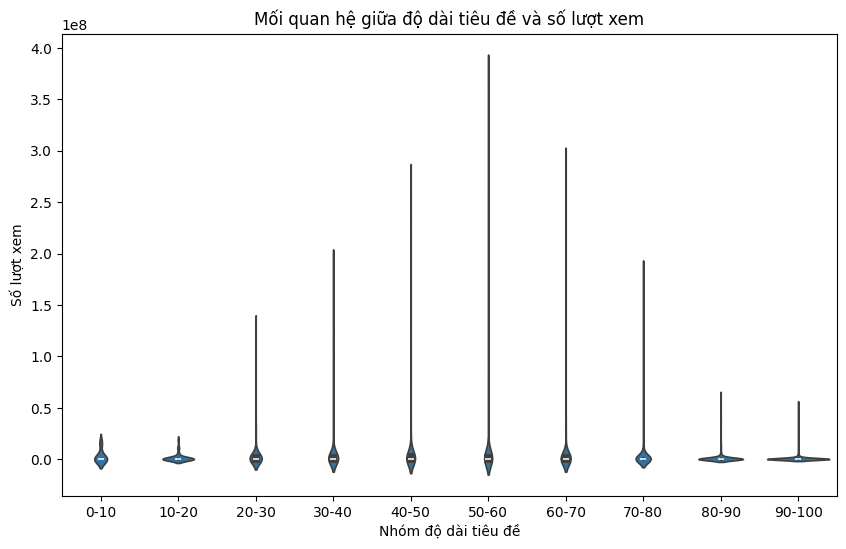

In [35]:
df['Nhóm độ dài tiêu đề'] = pd.cut(df['Độ dài tiêu đề'], bins=range(0, 101, 10), labels=[f"{i}-{i+10}" for i in range(0, 100, 10)])

# Vẽ biểu đồ violin
plt.figure(figsize=(10, 6))
sns.violinplot(x='Nhóm độ dài tiêu đề', y='Số lượt xem', data=df)

# Hiển thị biểu đồ
plt.title('Mối quan hệ giữa độ dài tiêu đề và số lượt xem')
plt.show()

### Từ khóa tiêu đề và mô tả xuất hiện nhiều nhất trong các video có lượt xem cao

C:\Users\HP\AppData\Local\Temp\ipykernel_70248\769198071.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



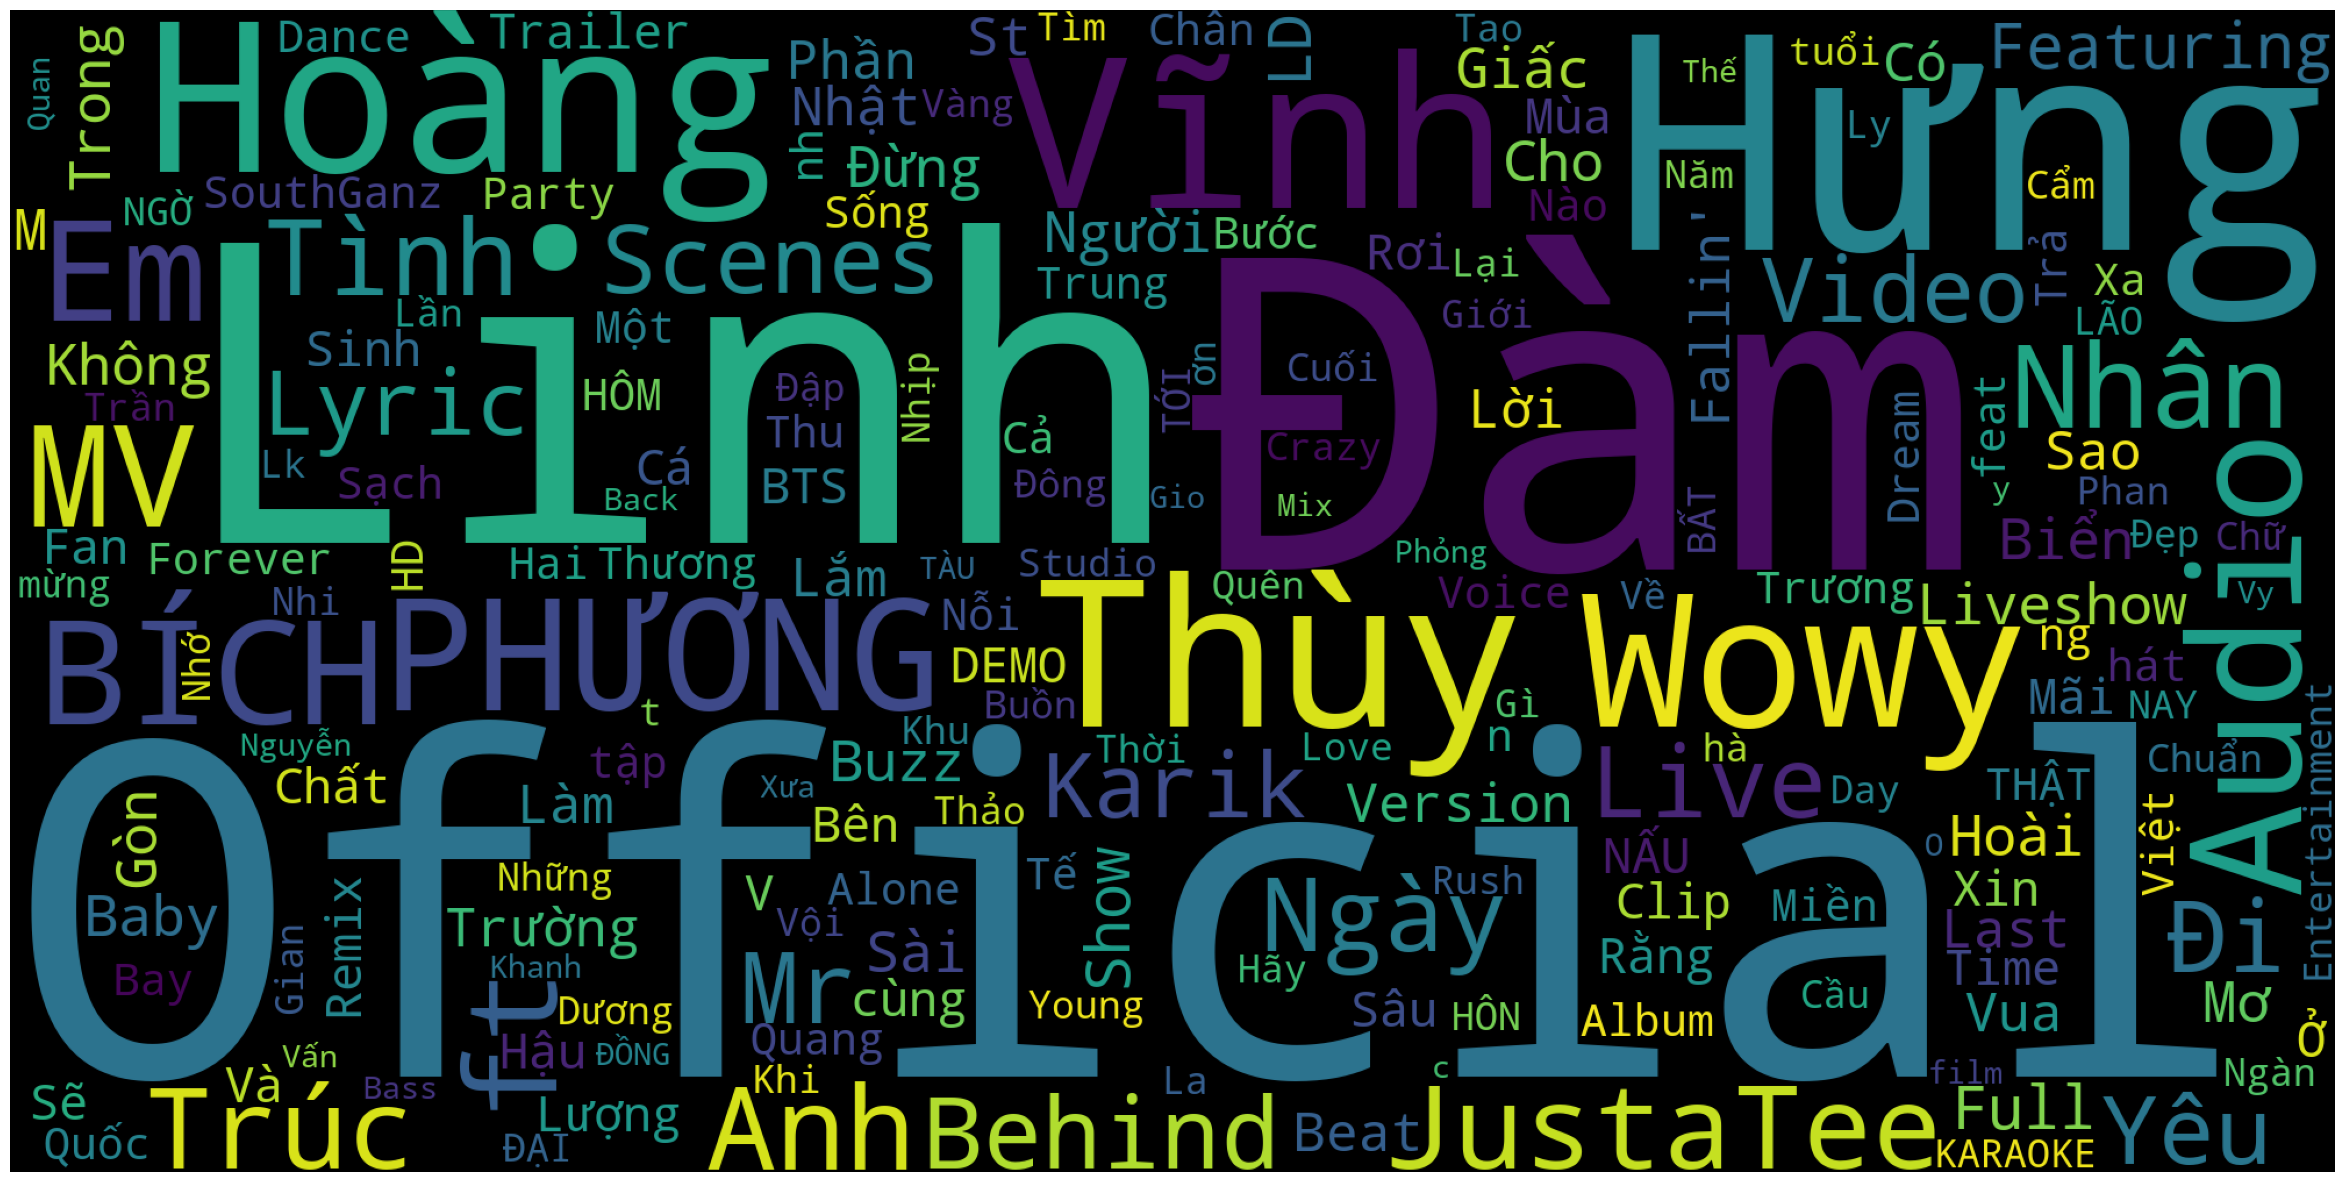

In [54]:
# Thiếp lập stopwords trong tiếng Việt
vietnamese_stopwords = ['và', 'của', 'trong', 'với', 'để', 'vì', 'là', 'một', 'có', 'theo', 'của']
stop_words = set(vietnamese_stopwords)

# Filter data for Đàm Vĩnh Hưng and Mỹ Tâm during 2010-2015
df_filtered = df[(df['Tên kênh'].isin(['Đàm Vĩnh Hưng', 'Mỹ Tâm', 'Wowy', 'JustaTeeMusic', 'Trúc Nhân', 'Hoàng Thùy Linh', 'BÍCH PHƯƠNG'])) &
                 (df['Ngày phát hành'] >= '2010-01-01') &
                 (df['Ngày phát hành'] <= '2015-12-31')]

# Apply stopword filtering to the 'Tag' column
df_filtered['tag_no_stopwords'] = df_filtered['Tiêu đề'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

# Create a list of all words from the filtered tags and join them into a single string
all_words = list([a for b in df_filtered['tag_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)

# Plot the word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()  # Display the plot

plot_cloud(wordcloud)


C:\Users\HP\AppData\Local\Temp\ipykernel_70248\1263089828.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



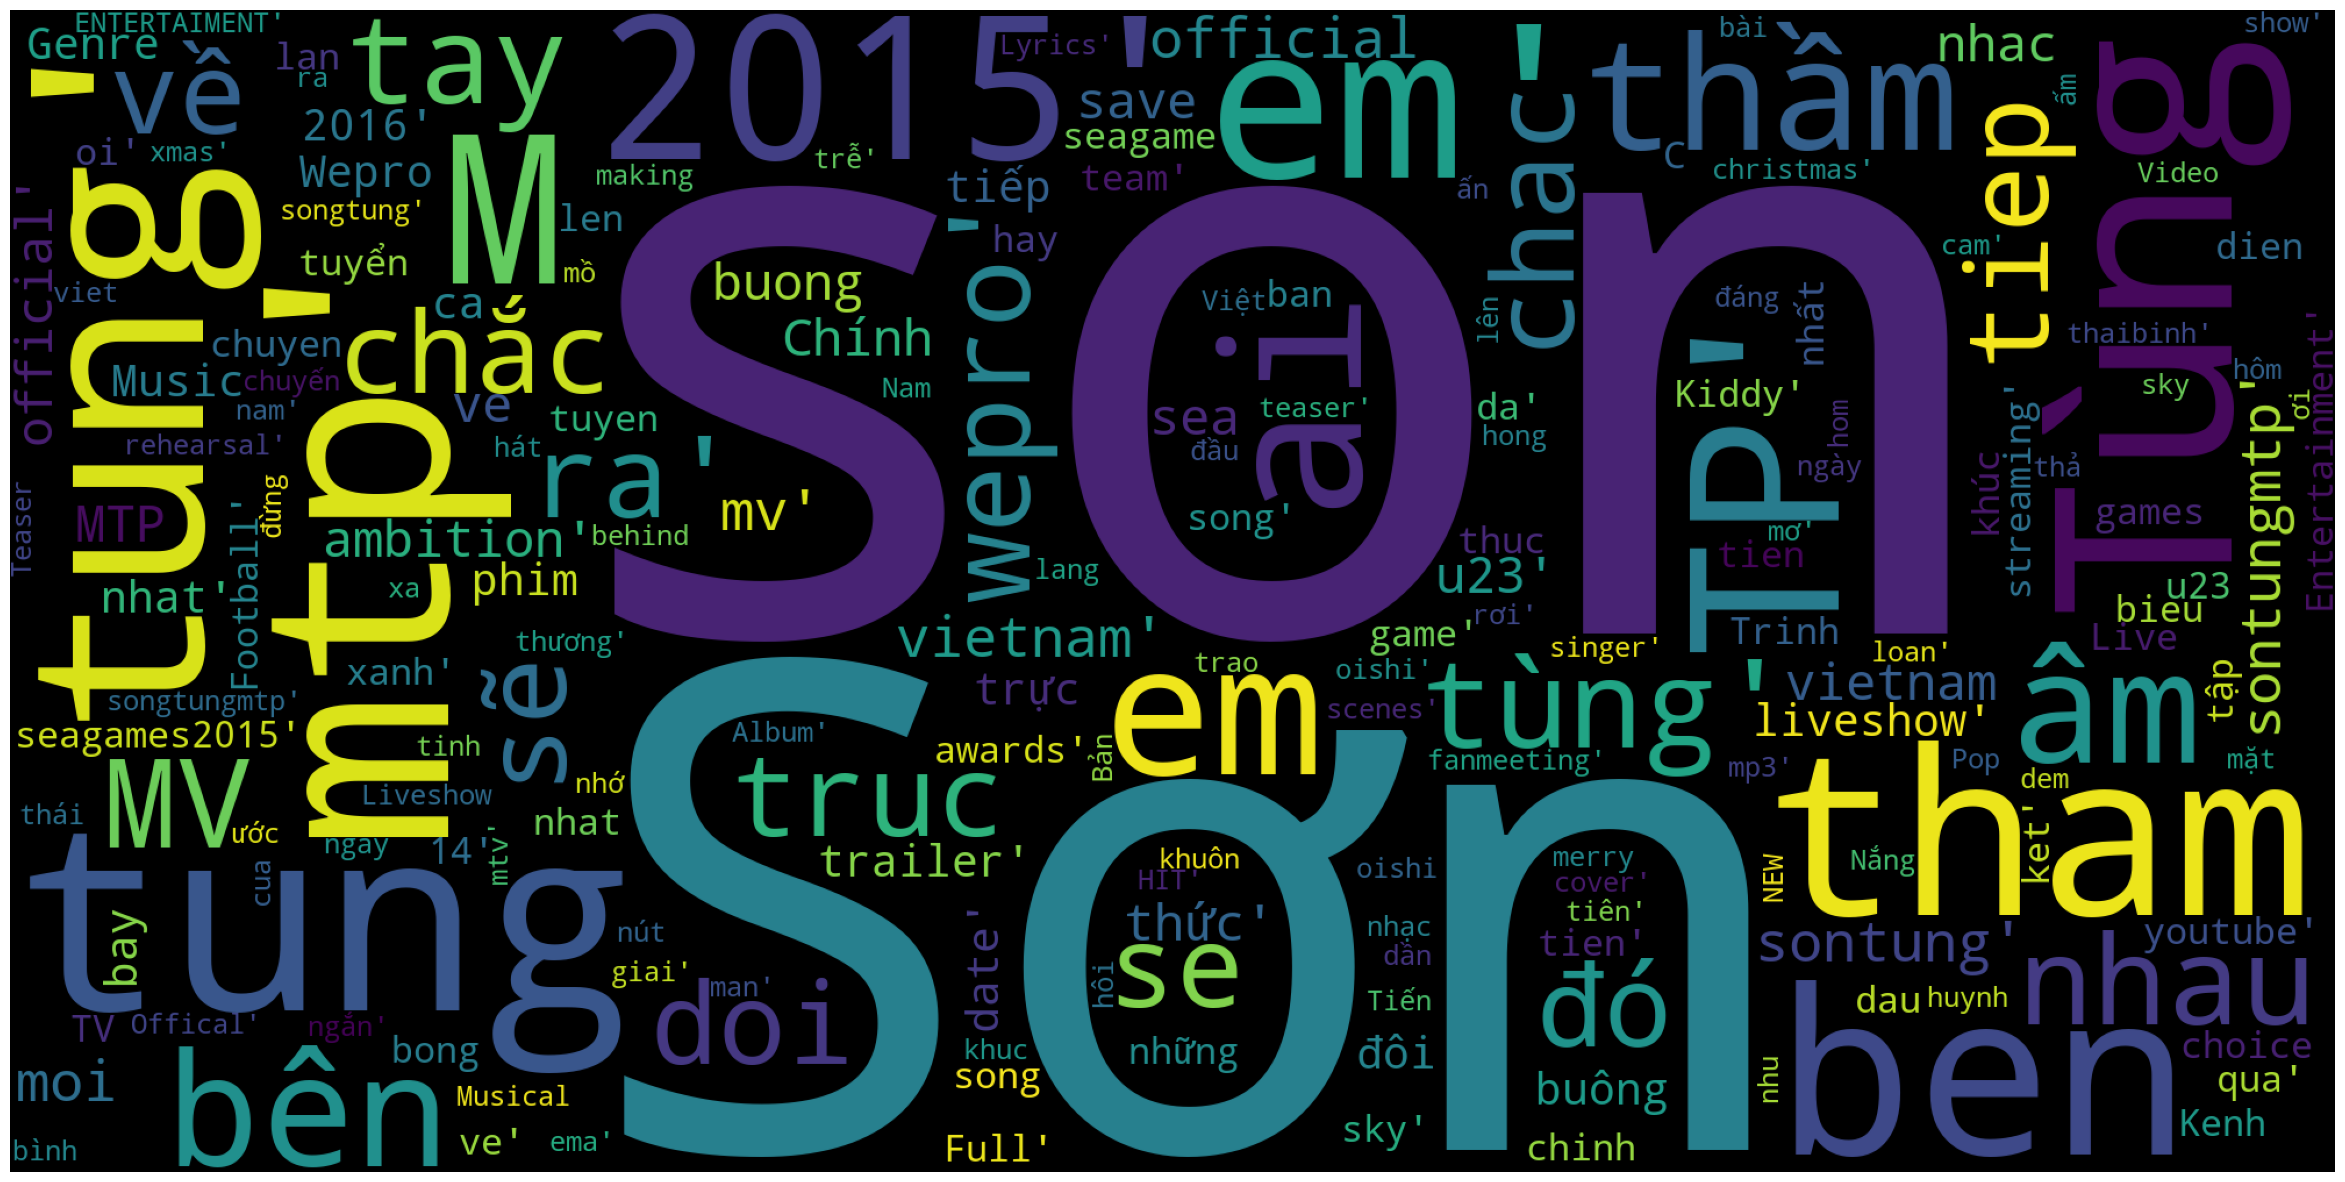

In [59]:
df_filtered = df[(df['Tên kênh'].isin(['Sơn Tùng M-TP Official'])) &
                 (df['Ngày phát hành'] >= '2010-01-01') &
                 (df['Ngày phát hành'] <= '2015-12-31')]

# Apply stopword filtering to the 'Tag' column
df_filtered['tag_no_stopwords'] = df_filtered['Tag'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

# Create a list of all words from the filtered tags and join them into a single string
all_words = list([a for b in df_filtered['tag_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)

plot_cloud(wordcloud)

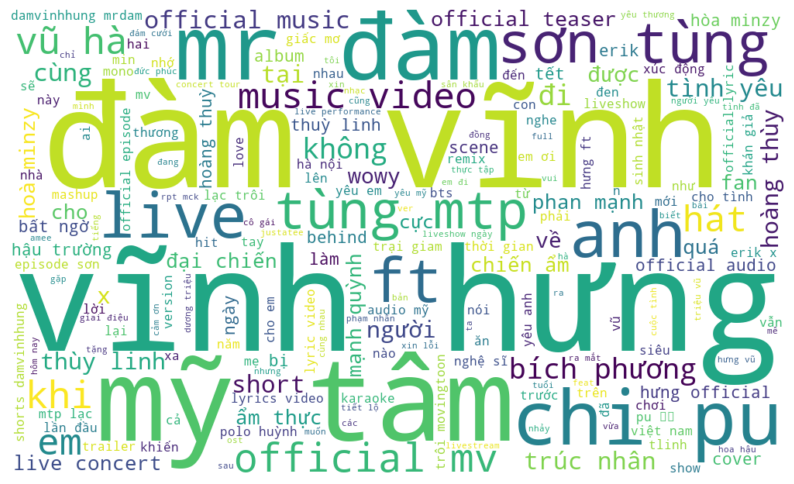

In [63]:

import string
def clean_title(title):
    # Chuyển thành chữ thường
    title = title.lower()
    # Loại bỏ dấu câu
    title = title.translate(str.maketrans('', '', string.punctuation))
    # Loại bỏ stopwords
    title = ' '.join([word for word in title.split() if word not in stop_words])
    return title

# Áp dụng hàm làm sạch dữ liệu cho cột Tiêu đề
df['clean_title'] = df['Tiêu đề'].apply(clean_title)

# Tạo một chuỗi duy nhất từ tất cả các tiêu đề đã làm sạch
all_titles = ' '.join(df['clean_title'])

# Tạo wordcloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_titles)

# Hiển thị wordcloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()